<a href="https://colab.research.google.com/github/Bisma-Shafiq/Machine-Learning-Tensorflow/blob/main/GAN_MNIST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense , Input , BatchNormalization , LeakyReLU , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255.00*2-1
x_test = x_test/255.00*2-1

In [ ]:
x_train.shape , x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [ ]:
N , H, W = x_train.shape
D = H*W

In [ ]:
x_train =  x_train.reshape(-1,D)
x_test = x_test.reshape(-1,D)

In [ ]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

# Model generator

In [ ]:
dim =100
def build_generator(dim,):

  input = Input(shape= (dim,))
  x = Dense(256,activation=LeakyReLU(alpha=0.2))(input)
  x = BatchNormalization(momentum=0.8)(x)
  x= Dense(512,activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.8)(x)
  x= Dense(1024,activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.8)(x)
  x= Dense(D,activation='tanh')(x)   # image output -1 ---- 1


  model = Model(input,x)
  return model

# Model Discriminator

In [ ]:
def build_discriminator(image_size):
  input = Input(shape = (image_size,))
  x = Dense(512,activation=LeakyReLU(alpha=0.2))(input)
  x = Dense(256,activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(1,activation='sigmoid')(x) # 0 ------ 1

  model = Model(input,x)
  return model

In [ ]:
# Build and compile discriminator
discriminator = build_discriminator(D)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5),metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# build  the combine model

generator = build_generator(dim)

In [ ]:
discriminator.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
generator.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 784)                 │         803,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
# create an iput for noise sample

z = Input(shape=(dim,))
z.shape

(None, 100)

In [ ]:
# pass noise through generator to generate image

img = generator(z)
img.shape

(None, 784)

In [ ]:
# Make sure to train generator

discriminator.trainable= False


In [ ]:
# passing output of generator to discrimator

fake_image = discriminator(img)
fake_image.shape

(None, 1)

In [ ]:
# create and compile the ombine model generator

combine_gen_model = Model(z,fake_image)
combine_gen_model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))

# training of model

In [ ]:
epochs = 2000
batch_size = 32
sample_period = 200


In [ ]:
# create batch labels to use when call batch_label
real = np.ones(batch_size)
fake = np.zeros(batch_size)

#store our loss

dis_loss = []
gen_loss =[]
import os
# create path to store generated image
if not os.path.exists('gan_images'):
  os.makedirs('gan_images')



In [ ]:
# A function to generate  a grid of random sample from generator and store it in file

def sample_images(epoch):
  rows, cols = 5, 5
  noise = np.random.randn(rows * cols, dim)
  imgs = generator.predict(noise)
  # Rescale images 0 - 1
  imgs = 0.5 * imgs + 0.5

  fig, axs = plt.subplots(rows, cols)
  cnt = 0
  for i in range(rows):
    for j in range(cols):
      axs[i, j].imshow(imgs[cnt].reshape(H, W), cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  fig.savefig("gan_images/%d.png" % epoch)
  plt.close()

In [ ]:
# train discriminator
for epoch in range(epochs):

  cnt = np.random.randint(0,x_train.shape[0],batch_size)
  real_image = x_train[cnt]

  # fake image generator
  noise = np.random.randn(batch_size,dim)
  fale_image = generator.predict(noise)

  # train discriminator
  dis_loss_real, dis_acc_real= discriminator.train_on_batch(real_image,real)
  dis_loss_fake, dis_acc_fake = discriminator.train_on_batch(fale_image,fake)
  d_loss = 0.5*(dis_loss_fake+dis_loss_real)
  d_acc = 0.5*(dis_acc_fake+dis_acc_real)

  # train generator
  noise = np.random.randn(batch_size,dim)
  g_loss = combine_gen_model.train_on_batch(noise,real)

  # again
  noise = np.random.randn(batch_size,dim)
  g_loss = combine_gen_model.train_on_batch(noise,real)

  #save losses
  dis_loss.append(d_loss)
  gen_loss.append(g_loss)

  if epochs %100==0:
    print(f'epoch:{epochs+1}/{epochs}, dis_loss: {d_loss:.2f},\
          dis_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}')

  if epochs % sample_period==0:
    sample_images(epoch)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.61
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.58
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
epoch:2001/2000, dis_loss: 0.87,          dis_acc: 0.33, g_loss: 0.56
1/1 ━━━━━━━━━━

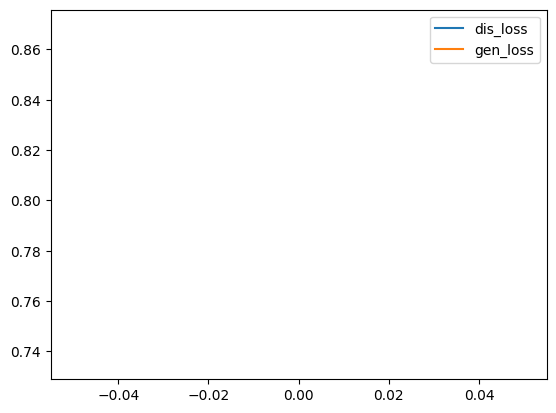

In [ ]:
plt.plot(dis_loss,label='dis_loss')
plt.plot(gen_loss,label='gen_loss')
plt.legend()
plt.show()

In [ ]:
!ls gan_images

In [ ]:
from skimage.io import imread
img = imread('gan_images/0.png')
plt.imshow(img)


In [ ]:
img = imread('gan_images/1000.png')
plt.imshow(img)